In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
X, y = make_moons(100, noise=0.25,random_state=2)

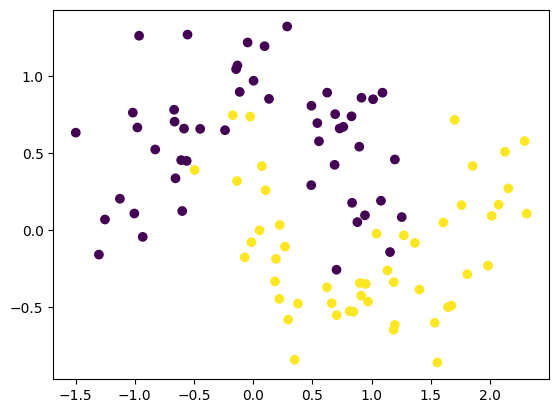

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [4]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

d:\Programming lang\PYTHON\Deep Learning Notebooks\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


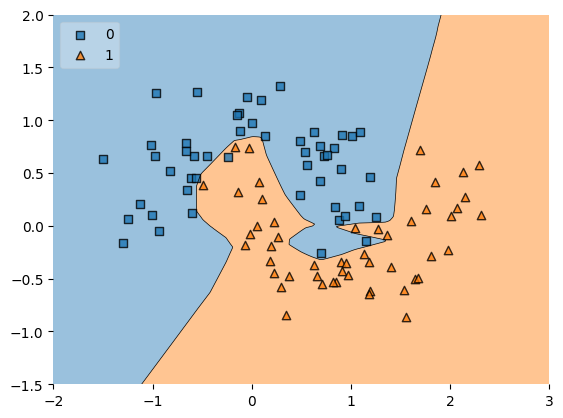

In [6]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

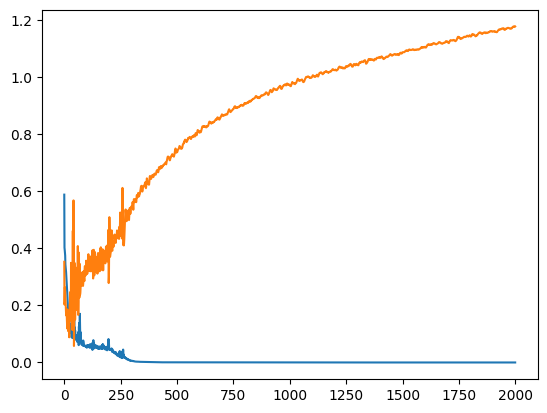

In [7]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [8]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


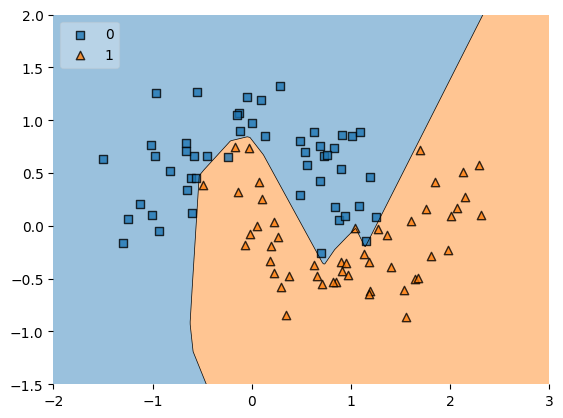

In [10]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

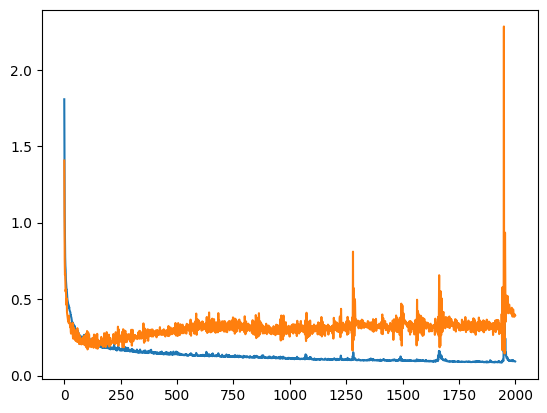

In [11]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [12]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

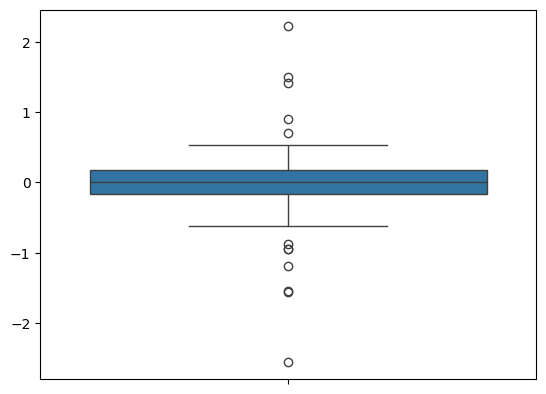

In [13]:
sns.boxplot(model1_weight_layer1)

<Axes: >

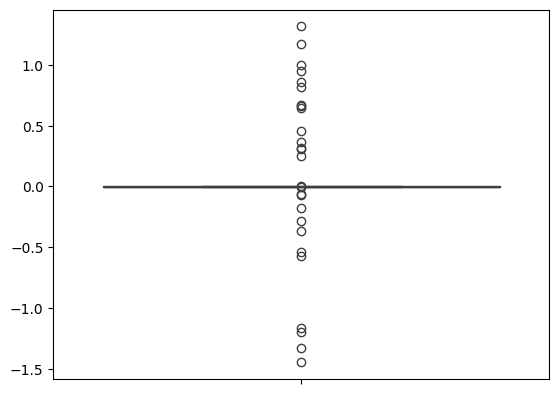

In [14]:
sns.boxplot(model2_weight_layer1)

In [15]:
model1_weight_layer1.min()

-2.561192

In [16]:
model2_weight_layer1.min()

-1.4425045

C:\Users\Pratham Gupta\AppData\Local\Temp\ipykernel_19492\2224180084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
C:\Users\Pratham Gupta\AppData\Local\Temp\ipykernel_19492\2224180084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

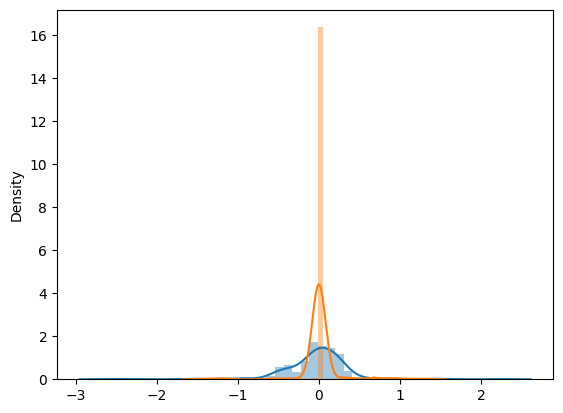

In [17]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [18]:
model1.get_weights()[0].reshape(256)

array([-4.89769131e-01,  2.26241484e-01, -2.21987680e-01,  2.20482796e-01,
       -4.54396605e-01,  2.12968379e-01, -1.79563537e-02,  3.75640601e-01,
        5.62592633e-02, -4.60477561e-01,  2.63797343e-01,  2.56466180e-01,
       -4.90142912e-01, -3.78186792e-01, -4.22295518e-02, -4.81797844e-01,
       -5.39189251e-03,  1.61430448e-01, -3.63029659e-01, -3.72791857e-01,
       -2.19749257e-01, -3.89739752e-01,  4.59974892e-02, -1.13036908e-01,
        2.01891512e-02,  1.49406483e-02,  3.13975424e-01,  2.93649822e-01,
        1.79591458e-02,  2.39285409e-01,  3.15727234e-01, -2.42241353e-01,
       -4.34289426e-01, -2.47316714e-03, -4.10465688e-01,  3.30754101e-01,
       -4.69935328e-01,  1.05188996e-01, -2.59552836e-01,  5.52839339e-02,
       -2.58837100e-02, -5.02340533e-02,  1.26389727e-01, -1.94111779e-01,
        2.02540383e-01,  2.57551879e-01, -5.43300450e-01, -3.97699594e-01,
        6.20369464e-02, -2.31446519e-01, -3.22880670e-02, -1.93659618e-01,
        1.17588118e-01, -

In [19]:
model3 = Sequential()

model3.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model3.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model3.add(Dense(1,activation='sigmoid'))

model3.summary()

d:\Programming lang\PYTHON\Deep Learning Notebooks\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 8s 865us/step


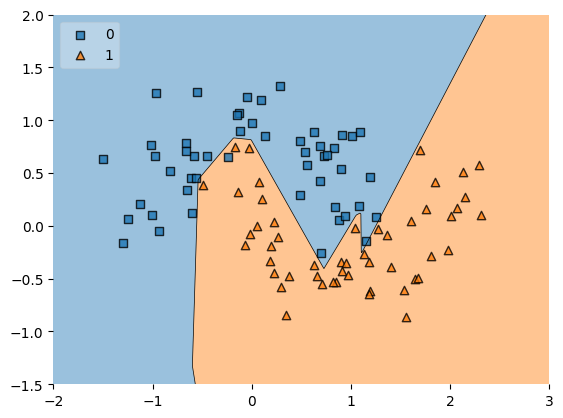

In [21]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

In [22]:
model3_weight_layer1 = model3.get_weights()[0].reshape(256)

C:\Users\Pratham Gupta\AppData\Local\Temp\ipykernel_19492\952455582.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
C:\Users\Pratham Gupta\AppData\Local\Temp\ipykernel_19492\952455582.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model3_weight_layer1)


<Axes: ylabel='Density'>

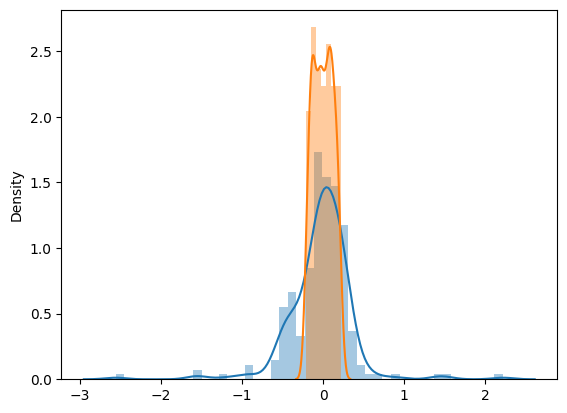

In [23]:
sns.distplot(model1_weight_layer1)
sns.distplot(model3_weight_layer1)